In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# outlier
- 무조건 제거해야 하는 것은 아님
- 이상치에 대한 군집이 형성되면 두 개의 군집으로 나눠서 분석할 수 있음
- 가중치를 둬서 ouliter에 대한 값의 변수를 추가할 수 있음
- 원하는 목적에 맞는 이상치 제거 방법을 고려해야함

In [141]:
# 각 반의 수학 점수
math1 = [40, 30, 20, 45, 63, 69, 25, 31, 12, 14, 100]
math2 = [11, 13, 14, 21, 22, 25, 10, 9, 12, 7, 100]

In [142]:
sp_df = pd.DataFrame({'scoring1' : math1, 'scoring2' : math2})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

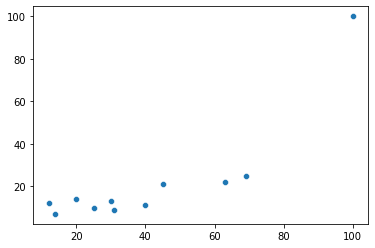

In [143]:
sns.scatterplot(math1, math2)

## ouliter 확인하기

In [195]:
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

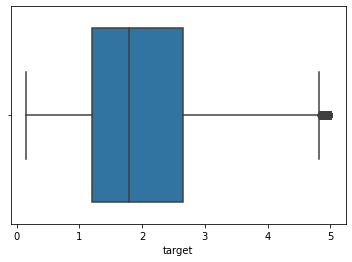

In [145]:
# boxplot
sns.boxplot(df.target)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AveRooms'>

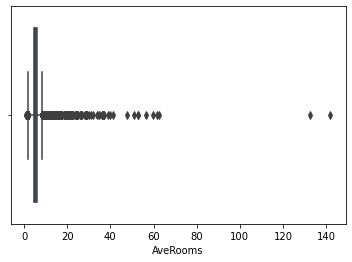

In [146]:
sns.boxplot(df.AveRooms)

In [147]:
df.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

In [148]:
df.AveRooms.describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

In [149]:
# 최대값 인덱스 추출
np.argmax(df['AveRooms'])

1914

In [150]:
df.iloc[1914]

MedInc          1.875000
HouseAge       33.000000
AveRooms      141.909091
AveBedrms      25.636364
Population     30.000000
AveOccup        2.727273
Latitude       38.910000
Longitude    -120.100000
target          5.000010
Name: 1914, dtype: float64

## 이상치를 제거하지 않고 rmse 줄이기 - 새로운 변수를 만들면 성능이 좋아질까?(가중치)

In [151]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [201]:
df_sp = df[['AveRooms', 'HouseAge', 'Population', 'target']]

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target', axis = 1), df_sp['target'], test_size = 0.3, random_state = 111)

## 베이스

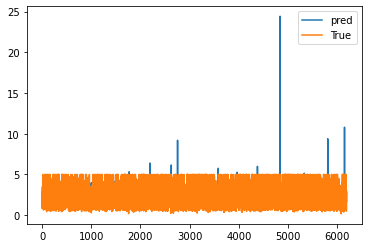

In [155]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [156]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

1.3737537935478012


## AveRooms 이상치 제거하기(IQR 제거)

In [157]:
Q1 = df_sp['AveRooms'].quantile(0.25)
Q3 = df_sp['AveRooms'].quantile(0.75)
IQR = Q3 - Q1
rev_range = 3
filter1 = (df_sp['AveRooms'] >= Q1 - rev_range*IQR) & (df_sp['AveRooms'] <= Q3+rev_range*IQR)

In [158]:
df_sp_rmv = df_sp.loc[filter1]

In [159]:
df_sp_rmv

,AveRooms,HouseAge,Population,target
0,6.984127,41.0,322.0,4.526
1,6.238137,21.0,2401.0,3.585
2,8.288136,52.0,496.0,3.521
3,5.817352,52.0,558.0,3.413
4,6.281853,52.0,565.0,3.422
...,...,...,...,...
20635,5.045455,25.0,845.0,0.781
20636,6.114035,18.0,356.0,0.771
20637,5.205543,17.0,1007.0,0.923
20638,5.329513,18.0,741.0,0.847


In [174]:
# 이상치 제거하기
def replace_outlier(value) : 
    Q1 = df_sp['AveRooms'].quantile(0.25)
    Q2 = df_sp['AveRooms'].quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3
    
    if((value < (Q1-rev_range*IQR))) : 
        value = np.nan
    if((value > (Q3+rev_range*IQR))) : 
        value = np.nan
    return value

df_sp['AveRooms'] = df_sp['AveRooms'].apply(replace_outlier)

<ipython-input-174-e3473ee891dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveRooms'] = df_sp['AveRooms'].apply(replace_outlier)


In [175]:
df_sp.isna().sum()

AveRooms       180
HouseAge         0
Population       0
target           0
AveRooms_sv      0
dtype: int64

In [176]:
# 이상치 제거 및 분석
df_sp2 = df_sp.dropna()
df_sp2

,AveRooms,HouseAge,Population,target,AveRooms_sv
0,6.984127,41.0,322.0,4.526,0
1,6.238137,21.0,2401.0,3.585,0
2,8.288136,52.0,496.0,3.521,0
3,5.817352,52.0,558.0,3.413,0
4,6.281853,52.0,565.0,3.422,0
...,...,...,...,...,...
20635,5.045455,25.0,845.0,0.781,0
20636,6.114035,18.0,356.0,0.771,0
20637,5.205543,17.0,1007.0,0.923,0
20638,5.329513,18.0,741.0,0.847,0


In [177]:
# 이상치 제거 후 train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('target', axis = 1), df_sp2['target'], test_size = 0.3, random_state = 111)

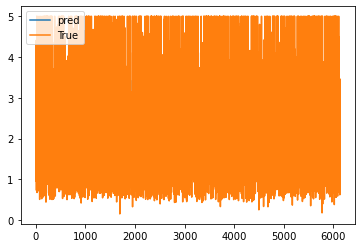

In [178]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [179]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse2)

1.1683440852254758


In [210]:
print(mse1)
print(mse2)

1.3737537935478012
1.1683440852254758


## 이상치를 살려 분석하는 경우

In [199]:
def saving_outlier(value):
    Q1 = df_sp['AveRooms'].quantile(0.25)
    Q3 = df_sp['AveRooms'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value < (Q1 - rev_range*IQR))):
        value = 1
    elif((value > (Q3 + rev_range*IQR))):
        value = 1
    else:
        value = 0
    return value

df_sp['AveRooms_sv'] = df_sp['AveRooms'].apply(saving_outlier)

<ipython-input-199-fb1da4a233ba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveRooms_sv'] = df_sp['AveRooms'].apply(saving_outlier)


In [200]:
df_sp.AveRooms_sv.sum()

180

In [183]:
df_sp

,AveRooms,HouseAge,Population,target,AveRooms_sv
0,6.984127,41.0,322.0,4.526,0
1,6.238137,21.0,2401.0,3.585,0
2,8.288136,52.0,496.0,3.521,0
3,5.817352,52.0,558.0,3.413,0
4,6.281853,52.0,565.0,3.422,0
...,...,...,...,...,...
20635,5.045455,25.0,845.0,0.781,0
20636,6.114035,18.0,356.0,0.771,0
20637,5.205543,17.0,1007.0,0.923,0
20638,5.329513,18.0,741.0,0.847,0


In [184]:
df_sp.isna().sum()

AveRooms       180
HouseAge         0
Population       0
target           0
AveRooms_sv      0
dtype: int64

In [202]:
#이상치를 제거한 train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target',axis = 1), df_sp['target'], test_size=0.3, random_state=111)

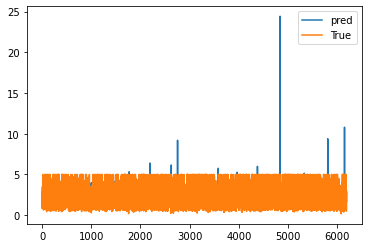

In [208]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

# 예측한 값
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [209]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

1.3737537935478012


In [211]:
print(mse1,'기존 base')
print(mse2,'outlier 제거')
print(mse3,'outlier saving')

1.3737537935478012 기존 base
1.1683440852254758 outlier 제거
1.3737537935478012 outlier saving
